In [ ]:
import numpy as np # linear algebra
import pandas as pd

import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

import math
from pprint import pprint
import seaborn as sns

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
import tensorflow_hub as hub

import string
from tensorflow.keras.layers import TextVectorization
import re

import nltk
nltk.download('vader_lexicon')
# Import stopwords with nltk.
from nltk.corpus import stopwords

nltk.download('stopwords')
stop = stopwords.words('english')

from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

layers = keras.layers
models = keras.models

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
data = pd.read_csv('/content/uw_new (1).csv')
data.head()

,Unnamed: 0,string,Label,Lab1,avarage
0,0,*screams in 25 different languages*,1,1,1
1,1,Families to sue over Legionnaires: More than 4...,1,3,2
2,2,Pandemonium In Aba As Woman Delivers Baby With...,1,2,1
3,3,My emotions are a train wreck. My body is a tr...,3,2,2
4,4,Alton brown just did a livestream and he burne...,1,0,0


In [ ]:
#sia = SIA()

#results = []

#for line in data['string']:
 #   pol_score = sia.polarity_scores(line)
  #  pol_score['headline'] = line
   # results.append(pol_score)

#pprint(results[:3], width=100)

In [ ]:
#data = pd.DataFrame.from_records(results)
data.drop_duplicates(['string'])
data['string']=data['string'].str.replace(r'https?:\/\/.*[\r\n]*','', case=False)
data['string'] = data['string'].str.lower()
#data['string'] = data['string'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
#data.head(5)

In [ ]:
def cat(x):
    if  x==0:
      return 'No Danger'
    if x==1:
      return 'Risk'
    if x==2:
      return 'Risk'
    if x==3:
      return 'Danger'
    if x == 4:
      return 'Danger'
data['classes'] = data['avarage'].apply(lambda x: cat(x))

In [ ]:
data['classes'].value_counts()

Risk         824
No Danger    814
Danger       226
Name: classes, dtype: int64

In [ ]:
data.isna().sum()

Unnamed: 0    0
string        0
Label         0
Lab1          0
avarage       0
classes       0
dtype: int64

In [ ]:
#def lemmatize_text(text):
 #   lemmatizer = WordNetLemmatizer()
  #  return [lemmatizer.lemmatize(w) for w in text] 

In [ ]:
#lmtzr = WordNetLemmatizer()
#data['lemmatize'] = data['headline'].apply(lambda lst:[lmtzr.lemmatize(word) for word in lst])

In [ ]:
train_size = int(len(data) * .8)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(data) - train_size))

Train size: 1491
Test size: 373


In [ ]:
def train_test_split(data, train_size):
    train = data[:train_size]
    test = data[train_size:]
    return train, test

In [ ]:
train_cat, test_cat = train_test_split(data['classes'], train_size)
train_text, test_text = train_test_split(data['string'], train_size)

In [ ]:
max_words = 1000
tokenize = keras.preprocessing.text.Tokenizer(num_words=max_words, char_level=False)

In [ ]:
tokenize.fit_on_texts(train_text) # fit tokenizer to our training text data
x_train = tokenize.texts_to_matrix(train_text)
x_test = tokenize.texts_to_matrix(test_text)


In [ ]:
# Use sklearn utility to convert label strings to numbered index
encoder = LabelEncoder()
encoder.fit(train_cat)
y_train = encoder.transform(train_cat)
y_test = encoder.transform(test_cat)

In [ ]:
# Converts the labels to a one-hot representation
num_classes = np.max(y_train) + 1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
#hub_layer = hub.KerasLayer(embed, input_shape=[],dtype= tf.string, trainable=True)

In [ ]:
batch_size = 5
epochs = 10
drop_ratio = .25

In [ ]:
# Build the model
model = models.Sequential()
#model.add(hub_layer)
model.add(layers.Dense(4, input_shape=(max_words,)))
model.add(layers.Dense(4))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(drop_ratio))
model.add(layers.Dense(num_classes))
model.add(layers.Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# model.fit trains the model
# The validation_split param tells Keras what % of our training data should be used in the validation set
# You can see the validation loss decreasing slowly when you run this
# Because val_loss is no longer decreasing we stop training to prevent overfitting
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/10
269/269 [==============================] - 1s 2ms/step - loss: 1.0489 - accuracy: 0.4325 - val_loss: 0.9794 - val_accuracy: 0.5400
Epoch 2/10
269/269 [==============================] - 0s 1ms/step - loss: 0.9732 - accuracy: 0.4676 - val_loss: 0.9327 - val_accuracy: 0.5333
Epoch 3/10
269/269 [==============================] - 0s 1ms/step - loss: 0.8967 - accuracy: 0.5354 - val_loss: 0.8906 - val_accuracy: 0.5667
Epoch 4/10
269/269 [==============================] - 0s 1ms/step - loss: 0.8114 - accuracy: 0.5772 - val_loss: 0.8751 - val_accuracy: 0.5800
Epoch 5/10
269/269 [==============================] - 0s 1ms/step - loss: 0.7426 - accuracy: 0.6234 - val_loss: 0.9093 - val_accuracy: 0.5533
Epoch 6/10
269/269 [==============================] - 0s 1ms/step - loss: 0.6855 - accuracy: 0.6943 - val_loss: 0.9557 - val_accuracy: 0.5867
Epoch 7/10
269/269 [==============================] - 0s 1ms/step - loss: 0.6269 - accuracy: 0.7547 - val_loss: 0.9608 - val_accuracy: 0.6000
Epoch 

In [ ]:
# Evaluate the accuracy of our trained model
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

75/75 [==============================] - 0s 1ms/step - loss: 0.9086 - accuracy: 0.6059
Test loss: 0.9085577726364136
Test accuracy: 0.6058981418609619


In [ ]:
text_labels = encoder.classes_ 

for i in range(10):
    prediction = model.predict(np.array([x_test[i]]))
    predicted_label = text_labels[np.argmax(prediction)]
    print(test_text.iloc[i][:50], "...")
    print('Actual label:' + test_cat.iloc[i])
    print("Predicted label: " + predicted_label + "\n")

however , it lacks grandeur and that epic quality  ...
Actual label:No Danger
Predicted label: No Danger

invading iraq was a catastrophic mistake'.

diplom ...
Actual label:Risk
Predicted label: Risk

@babysweet420 i'm mad 420 in your name &amp; you d ...
Actual label:Risk
Predicted label: Risk

philippines must protect internally displaced pers ...
Actual label:No Danger
Predicted label: Risk

wild fires in california... must be global warming ...
Actual label:Risk
Predicted label: Risk

just had a panic attack bc i don't have enough mon ...
Actual label:Danger
Predicted label: Risk

my dogûªs just blown his kennel up ûò bloody yor ...
Actual label:Risk
Predicted label: No Danger

traffic accident n cabrillo hwy/magellan av mir (0 ...
Actual label:Risk
Predicted label: Risk

do you feel like you are sinking in low self-image ...
Actual label:Risk
Predicted label: Risk

unions say they are supportive of 'london' yet are ...
Actual label:No Danger
Predicted label: Risk



In [ ]:
tokenize.fit_on_texts(["I wish my teacher choked to death"])
tokenize.fit_on_texts(["I gave my teacher an apple"])
tokenize.fit_on_texts(["I love my teddy"])

In [ ]:
a= tokenize.texts_to_matrix(np.array(["I wish my teacher choked to death"]))
b= tokenize.texts_to_matrix(np.array(["I gave my teacher an apple"]))
c= tokenize.texts_to_matrix(np.array(["I love my teddy"]))

In [ ]:
pred = model.predict(a)
text_labels[np.argmax(pred)]

NameError: ignored

In [ ]:
y_softmax = model.predict(x_test)

y_test_1d = []
y_pred_1d = []

for i in range(len(y_test)):
    probs = y_test[i]
    index_arr = np.nonzero(probs)
    one_hot_index = index_arr[0].item(0)
    y_test_1d.append(one_hot_index)

for i in range(0, len(y_softmax)):
    probs = y_softmax[i]
    predicted_index = np.argmax(probs)
    y_pred_1d.append(predicted_index)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

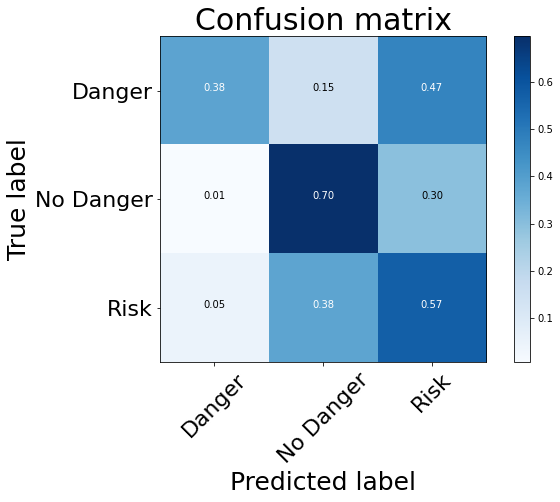

In [ ]:
cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(10,6))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()